_Main topics covered during today's session:_

Previous NB:

1. **Debugging concepts (copy/deepcopy)**

This NB:

1. **Debugging your output variables (using PMT1 Problem 26)**

Additional NB:

1. **Troubleshooting Exam Solution Data Template Code**

# Debugging your functions

Let's look at the process of writing functions in python a little closely and understand the goal of the process. The below diagram summarizes what a 'typical' flow of writing functions should look like, **when you are taking the exams in this course.**

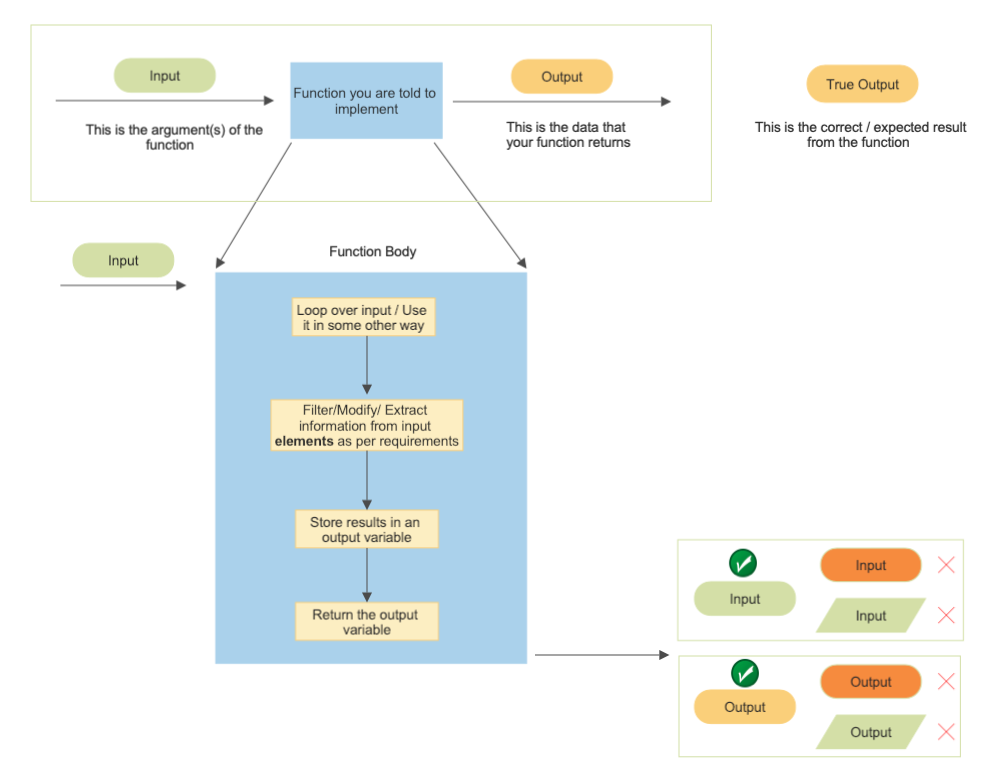

Let us see how python handles global variables and how the data type of a variable affects it's behavior inside a function

In [ ]:
number_1 = 5
number_2 = 10

def multiply_and_add(number_1, number_2):
    number_1 = number_1 * 10
    number_2 = number_2 * 10
    return number_1 + number_2

a_sum = multiply_and_add(number_1, number_2)


print("The value of the result of function : {}".format(a_sum))
print("The value of argument 1 : {}".format(number_1))
print("The value of argument 2 : {}".format(number_2))

As we can see above, the function worked correctly, and the values of the global variables number_1 and number_2 did not change, even though we used them as arguments and parameter names in our function. This is because Python stores variables from a function in a different memory location from global variables. They are isolated. Thus, the variable number_1 can have one value (5) globally, and a different value (50) inside the function, where it is isolated.

## What About Lists and Dictionaries?

In [ ]:
initial_list = [1, 2, 3]

def duplicate_last(a_list):
    last_element = a_list[-1]
    a_list.append(last_element)
    return a_list

new_list = duplicate_last(a_list = initial_list)

print("Contents of the list after calling the function : {}".format(new_list))
print("Contents of the global list : {}".format(initial_list))

As we can see, here the global value of initial_list was updated, even though its value was only changed inside the function!

In [ ]:
content_ratings = {'4+': 4433, '9+': 987, '12+': 1155, '17+': 622}

def make_percentages(a_dictionary):
    total = 0
    for key in a_dictionary:
        count = a_dictionary[key]
        total += count

    for key in a_dictionary:
        a_dictionary[key] = (a_dictionary[key] / total) * 100

    return a_dictionary

In [ ]:
c_ratings_percentages = make_percentages(content_ratings)

print("Contents of the dictionary after calling the function : {}".format(c_ratings_percentages))
print("Contents of the global dictionary : {}".format(content_ratings))

Just as we saw with lists, our global content_ratings variable has been changed, even though it was only modified inside of the make_percentages() function we created.

## Mutable and Immutable Data Types

In Python, data types can be either mutable (changeable) or immutable (unchangable). And while most of the data types we’ve worked with in introductory Python are immutable (including integers, floats, strings, Booleans, and tuples), lists and dictionaries are mutable. That means a global list or dictionary can be changed even when it’s used inside of a function, just like we saw in the examples above.

In [ ]:
from IPython import display
display.Image("py1m6_imm_correct.gif")

- a initially points toward 5.
- a += 1 is run, and this moves the pointer from 5 to 6, it doesn’t actually change the number 5.

In [ ]:
from IPython import display
display.Image("py1m6_same_lists.gif")

## How to not modify lists and dictionaries?

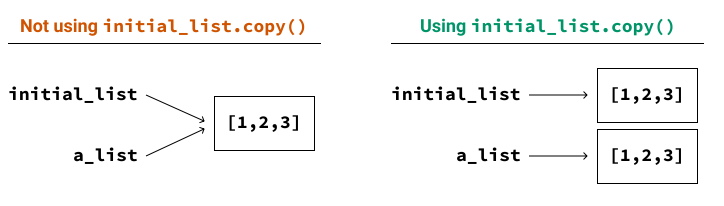

### The above picture gives a visual representation of using variable assignment versus variable copy.

### Recall that we first covered this topic during our Week 2 session, in NB week02_session02_NB02_refs_copies.ipynb. 

### That notebook also included a discussion of the .copy() and .deepcopy() functions.

### Use .copy() when your list/dict is not nested, but you must use .deepcopy() when you have nested data. See the referenced notebook and the below links for details.

https://www.geeksforgeeks.org/copy-python-deep-copy-shallow-copy/

https://docs.python.org/3/library/copy.html

In [ ]:
initial_list = [1, 2, 3]

def duplicate_last(a_list):
    copy_list = a_list.copy() # making a copy of the list
    last_element = copy_list[-1]
    copy_list.append(last_element)
    return copy_list

new_list = duplicate_last(a_list = initial_list)
print(new_list)
print(initial_list)

In [ ]:
content_ratings = {'4+': 4433, '9+': 987, '12+': 1155, '17+': 622}

def make_percentages(a_dictionary):
    total = 0
    for key in a_dictionary:
        count = a_dictionary[key]
        total += count

    for key in a_dictionary:
        a_dictionary[key] = (a_dictionary[key] / total) * 100

    return a_dictionary


c_ratings_percentages = make_percentages(content_ratings.copy()) # making a copy of the dictionary
print(c_ratings_percentages)
print(content_ratings)

In [ ]:
content_ratings = {'4+': 4433, '9+': 987, '12+': 1155, '17+': 622}

def make_percentages(a_dictionary):
    copy_dict = a_dictionary.copy() # create a copy of the dictionary
    total = 0
    for key in a_dictionary:
        count = a_dictionary[key]
        total += count

    for key in copy_dict: #use the copied table so original isn't changed
        copy_dict[key] = (copy_dict[key] / total) * 100

    return copy_dict

c_ratings_percentages = make_percentages(content_ratings)
print(c_ratings_percentages)
print(content_ratings)